In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hwk2-task2-salmon.ipynb")

# Task 2: Wrangling Alaska salmon catch data 

## Instructions 

- First, update the following cell to have a link to *your* Homework 2 GitHub repository:

**UPDATE THIS LINK**
https://github.com/meganhessel/eds220-hwk2-Hessel.git


- Review the [complete rubric for this task](https://docs.google.com/document/d/1x0BoU6IH4cnOR1-n7i9CYQ9wUC37yDpYlQ4j6rCfcsU/edit?tab=t.0) before starting.

- **Meaningful commits should be made every time you finish a major step.** We'll check your repository and view the commit history.

- **Every code cell should have a comment.** Err on the side of commenting too much for now. Comments should follow best practices.

- **Do not update the top cell with the `otter` import**, this is used internally for grading.

## Acknowledgments

This exercise is based on the [Cleaning and Wrangling Data in R lesson by the NCEAS Learning Hub](https://learning.nceas.ucsb.edu/2023-06-delta/session_11.html).


> Halina Do-Linh, Carmen Galaz García, Matthew B. Jones, Camila Vargas Poulsen. 2023. Open Science Synthesis training Week 1. NCEAS Learning Hub & Delta Stewardship Council.


## About the data

In this task you will use simplified data from the Alaska Department of Fish & Game containing commercial salmon catch data from 1878 to 1997. The original data can be accessed from the KNB repository:

> [Mike Byerly. (2016). Alaska commercial salmon catches by management region (1886-1997).](https://knb.ecoinformatics.org/view/df35b.304.2) Gulf of Alaska Data Portal. df35b.304.2.

The simplified dataset is in CSV format in the homework repository and has the following columns:

| Column | Description |
| ------ | ----------- | 
| Regions | Region code |
| Year | Year fish were caught |
| notesRegCode | Notes and comments |
| Species | Species of salmon caught |
| Catch | Commercial catches of salmon species (in thousands of fish) |

## COMPLETE WORKFLOW

You will use the next code cell to complete the last exercise in the task. Leave it blank for now. 

<Axes: title={'center': 'Average Commercial Salmon Catches by Region from 1878 to 1997'}, xlabel='Region', ylabel='Salmon Catches (Landing Records)'>

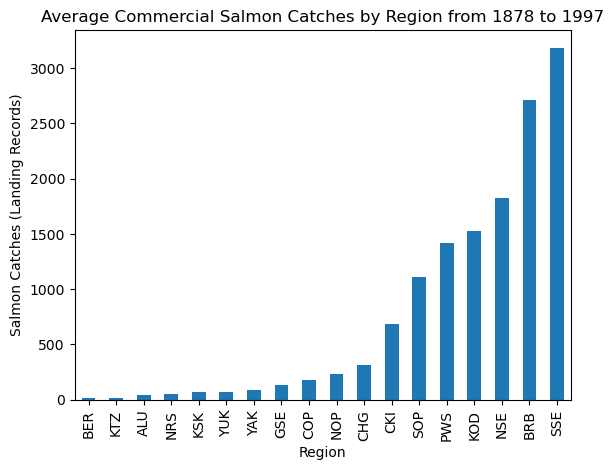

In [2]:
# FINAL CODE

# 1) Importing Libraries 
import pandas as pd 
import numpy as np 

# 2) Loading Data 
catch_data = pd.read_csv('data/salmon_data.csv')

# 3) Data Investigation 
    # catch_data.info
    # catch_data.dtypes

# 4) Data Cleaning 
# 4a) Removing the 'notesRegCode' column using .drop()
catch_data = catch_data.drop(columns = 'notesRegCode') 
# 4b) Changing 'Catch' col type to int64 
catch_data.loc[catch_data['Catch'] == "I", 'Catch'] = 1   # Change the "i" to 1 
catch_data['Catch'] = catch_data[['Catch']].astype('int64')    # Change type of 'Catch' col

# 5) Group by and summarise 
avg_region = catch_data.groupby('Region')['Catch'].mean()

# 6) Vizulation 
avg_region.sort_values(ascending = True).plot(kind = "bar", 
               title = "Average Commercial Salmon Catches by Region from 1878 to 1997", 
               ylabel = "Salmon Catches (Landing Records)")

## 1

a. Uset this code cell to import the data from the `salmon_data.csv` as `catch_data`. Look at the head of the dataframe. 

<!-- BEGIN QUESTION -->



In [3]:
# Import Libraries
import pandas as pd 
import numpy as np 

In [4]:
# a.
# Read in Data 
catch_data = pd.read_csv('data/salmon_data.csv')

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

b. Use this code cell to make some other preliminary data exploration of your choosing.

In [5]:
# b.
# Prelimiary data exploration 
catch_data.info
catch_data.dtypes
    # "Year" is an interger 
    # "Catch" is suppose to be a number... But its an object 

catch_data.nunique()

catch_data['Region'].unique() # Region names are good 
catch_data['Species'].unique() # Species names are good 
catch_data['Year'].sort_values().unique() # 1878 - 1997 

array([1878, 1879, 1880, 1881, 1882, 1883, 1884, 1885, 1886, 1887, 1888,
       1889, 1890, 1891, 1892, 1893, 1894, 1895, 1896, 1897, 1898, 1899,
       1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910,
       1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921,
       1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932,
       1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943,
       1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954,
       1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965,
       1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976,
       1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987,
       1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997])

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

c. Use this markdown cell to explain why you decided to do the exploration in c. and what information you obtained from doing it.

I like to look at all the columns, and dig into the unique attributes in each column. 
What info I got 
- There is 5 columns: region, year, species, catch, and notes 
- df dim = 8540, 5 
- 18 Regions that are shortened into 3 (all caps) letter 
- 5 Species - all inputed correctly with no repeats or white spaces 
- Years are from 1878 to 1997 


What need to be changed: 
- The "Year" column is seen as "int64"
- The "Catch" column is suppose to be numbers, but it is seen as "object" 

<!-- END QUESTION -->

## 2
In the next cell:

a. Store the unique values of the `notesRegCode` column in the `notes_unique` variable. 

In [6]:
# Looking at unique values in the note column 
notes_unique = catch_data['notesRegCode'].unique()
print(notes_unique)

[nan 'Includes Yakutat catches' 'Yakutat catch included in No SE AK catch'
 'Estimated from canned production, probably sockeye' 'No fishery'
 'Bering River catches included in Copper River catches'
 'Includes Bering River catches; estimated from canned'
 'Includes Bering River catches'
 'Coho and pink catch estimated from canned production'
 'Includes Bering River; coho and pink estimated fro canned'
 'Pink catch estimated from canned'
 'Includes Bering River; coho pink and chum estimated from canned'
 'Includes Bering River; pink estimated from canned'
 'Includes Bering River; pink and chum estimated from canned'
 'Includes Copper River catches'
 'Includes Copper River catches; coho catch porbably mostly pinks'
 'Eshamy District only' 'Estimated from canned; excludes Resurrection Bay'
 'Estimated from canned production' 'No Resurrection Bay fishery'
 'Resurrection bay contribution estimated from canned production'
 'No reported catch'
 'Sockeye and pink and 9922 chum from Port Claren

In [7]:
grader.check("q2a")

q2a results: All test cases passed!

b. Update the dataframe so it doesn't include the `notesRegCode` column. Verify the column is no longer in the dataframe.

In [8]:
# Removing the 'notesRegCode' column using .drop()
catch_data = catch_data.drop(columns = 'notesRegCode')

In [9]:
grader.check("q2b")

q2b results: All test cases passed!

<!-- BEGIN QUESTION -->

## 3
Does each column have the expected data type? Use this code cell to obtain this information and write your answer in the next markdown cell.


No! 
- Year column is being read as an interger (need to be read as a datetime). 
- Catch is being read as a object (needs to be read as a interger).

In [10]:
# Looking at the data types of each column 
catch_data.dtypes

Region     object
Year        int64
Species    object
Catch      object
dtype: object

<!-- END QUESTION -->

## 4 
The following cell shows a first attempt at updating the `Catch` column to be of data type `int64` instead of `object`. Converting from one data type to another is often called **casting**. 

To do it we use the [`astype()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.astype.html) method for `pandas.Series`. The `astype()` method does not modify the `pandas.Series` in place.

Run the next cell and read the end of the error message closely.

In [11]:
# Wrongly converting the 'Catch' column's type
# Because "catch" col has a letter in it - read in error message

# catch_data['Catch'].astype('int64')

## 5 

The previous error tells us there is a value 'I' (as in the letter 'I') that could not be converted to integer type.  It turns out the original data set was created from a PDF which was automatically converted into a CSV file and this 'I' vlaue should be 1.

In the next cell find the row(s) causing this issue. Show the filtered row(s) as the output. Store your answer in the `catch_I` variable. `catch_I` should have one observation and contain the following columns: Region, Year, Species, Catch. It should contain the original index number in order to pass the test. 

In [12]:
# Looking for the "i" in the 'Catch' column 
catch_I = catch_data[catch_data['Catch'] == 'I']
catch_I 

# ANOTHER METHOD: catch_data.loc[catch_data['Catch'] = 'I']

,Region,Year,Species,Catch
400,GSE,1955,Chinook,I


In [13]:
grader.check("q5")

q5 results: All test cases passed!

## 6
In the next cell:

1. Update the value of I to 1.
2. Access the row you updated to verify the value was changed and store this singe row in the `catch_1` variable. 

<!-- BEGIN QUESTION -->



In [14]:
# Locating where "catch" = 'I' and updating it to = 1 

# SYNTAX METHODS 
    #`df.loc[condition, 'col'] = new_value`   
    # df.loc[row_selection, column_name] = new_values
    # Df.loc[df.column == 'trait', 'column'] = 'new_trait'

catch_1 = catch_data.loc[catch_data['Catch'] == "I", 'Catch'] = 1

catch_1 = catch_data.loc[400, 'Catch'] = 1

In [15]:
# Print catch_1
catch_1

1

In [16]:
# Checking if there are any more places where "catch" = 'I'
catch_data.loc[catch_data['Catch'] == 'I']

,Region,Year,Species,Catch


<!-- END QUESTION -->

## 7
In the next cell:

1. Update the `Catch` column in `catch_data` to be of type `int64`.
2. Confirm you have updated the data type. Store the type of the `catch` column in the `catch_column_type` variable.

In [17]:
# Updating the dataframe with 'catch' as int64
    #catch_data['Catch'] = 
    #pd.to_numeric(catch_data['Catch']) 

catch_data['Catch'] = catch_data[['Catch']].astype('int64')

In [18]:
# Checking if the column changed types 
catch_data.dtypes

Region     object
Year        int64
Species    object
Catch       int64
dtype: object

In [19]:
# Saving it as a new object for grader 
catch_column_type =  catch_data['Catch'].astype("int64").dtype

catch_column_type

dtype('int64')

In [20]:
grader.check("q7")

q7 results: All test cases passed!

<!-- BEGIN QUESTION -->

## 8
Create a data frame with the average salmon catch per region. HINT: use `groupby()`. Store your dataframe in new variable called `avg_region`


In [21]:
# Average Salmon Catch per Region 
avg_region = catch_data.groupby('Region')['Catch'].mean()
avg_region

Region
ALU      40.383908
BER      16.372549
BRB    2709.796491
CHG     315.487273
CKI     683.571429
COP     179.223404
GSE     133.841463
KOD    1528.350000
KSK      67.642353
KTZ      18.836145
NOP     229.493478
NRS      51.502703
NSE    1825.020870
PWS    1419.236697
SOP    1110.942222
SSE    3184.660714
YAK      91.922917
YUK      68.645570
Name: Catch, dtype: float64

In [22]:
grader.check("q8")

q8 results: All test cases passed!

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## 9 

Use the dataframe you created in 8 to make a bar graph of the estimated average salmon catches by region from 1878 to 1997. The bars in the graph should be ordered by magnitude (increasing or decreasing is ok). Add a title  to your graph and update the axes labels if needed (check the units for the salmon catch). 

<Axes: title={'center': 'Average Commercial Salmon Catches by Region from 1878 to 1997'}, xlabel='Region', ylabel='Salmon Catches (Landing Records)'>

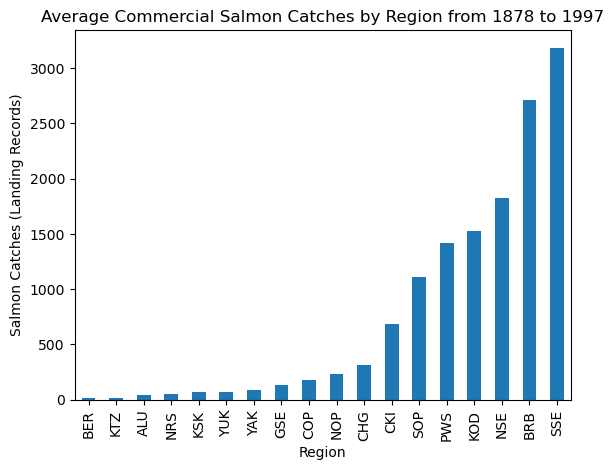

In [23]:
# Plot Average Salmon Catch per Region  
avg_region.sort_values(ascending = True).plot(kind = "bar", 
               title = "Average Commercial Salmon Catches by Region from 1878 to 1997", 
               ylabel = "Salmon Catches (Landing Records)")

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## 10

Write a brief description with key takeaways from the plot. Your answer shuld use the complete names for the management areas instead of their codes. You can find what each code stands for in the [original data repository](https://knb.ecoinformatics.org/view/df35b.304.2#df35b.303.1).

### Add column based on Management Region: 

In [24]:
# METHOD 1: Creating a dictionary... didn't work  
dictionary = {
    1: ['GSE', 'NSE', 'SSE', 'YAK'], 
    2: ['BER', 'COP', 'PWS', 'CKI', 'BRB'], 
    3: ['KSK', 'YUK', 'NRS', 'KTZ'], 
    4: ['KOD', 'CHG', 'SOP', 'ALU', 'NOP']
}

catch_data['Manag_region'] = catch_data['Region'].map(dictionary)

In [25]:
# METHOD 2: Creating a funcion 
def label_race(region):
    if region in ['GSE', 'NSE', 'SSE', 'YAK']:
        return "Region 1 SE"
    if region in ['BER', 'COP', 'PWS', 'CKI', 'BRB']:
        return "Region 2 Centeral"
    if region in ['KSK', 'YUK', 'NRS', 'KTZ']:
        return "Region 3 AYK"
    elif region in ['KOD', 'CHG', 'SOP', 'ALU', 'NOP']: 
        return "Region 4 Westward"
    else:
        return "other"
    
catch_data['Man_reg'] = catch_data["Region"].apply(label_race)

In [26]:
# Group by and summarise for management regions/ domains 
avg_region_2 = catch_data.groupby('Man_reg')['Catch'].mean()
avg_region_2

Man_reg
Region 1 SE          1447.800000
Region 2 Centeral    1057.071756
Region 3 AYK           51.554930
Region 4 Westward     680.007677
Name: Catch, dtype: float64

<Axes: title={'center': 'Average Commercial Salmon Catches by Management Region from 1878 to 1997'}, xlabel='Management Regions', ylabel='Salmon Catches (Landing Records)'>

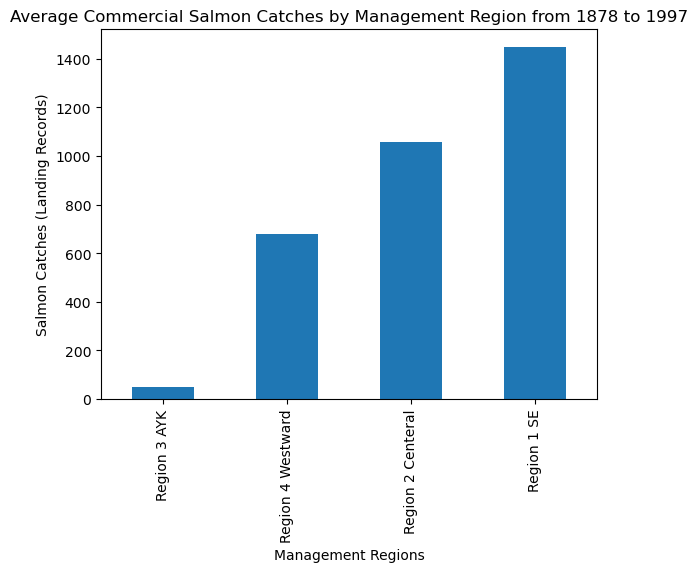

In [27]:
# Bar chart of managment region/ domain
avg_region_2.sort_values(ascending = True).plot(kind = "bar", 
               title = "Average Commercial Salmon Catches by Management Region from 1878 to 1997", 
                xlabel = "Management Regions",
               ylabel = "Salmon Catches (Landing Records)")

## Key Takeways 

Compared to all the other regions, Southern Southeastern Alaska (SSE) and Bristol Bay Management Area (BRB) have the most salmon catches with landing records over 2,500. 

Following these two regions in Salmon catches are Northern Southeast Alaska (NSE), Kodiak Managment Area (KOD), Prince Willian Sound Subarea (PWS), South Penunsula Subarea (SOP), and Cook Inlet Managament Area (CKI). 

Then all the other areas have less than 500 landing records. 

The region with the most salmon catches, Southern Southeastern Alaska (SSE), is within the Southeastern Managment Region which also consists of Unallocated Southeast Alaska (GSE), Northern Southeastern Alaska (NSE), and Yakutat(YAK). The Southeastern Management Region, on average, has the most catches in comparsion to the other 3 Management Regions. 

Management Region 3, the Arctic-Yukon-Kuskokwim Management Region (consisting of Kuskokwim Management Area (KSK), Yukon Management Area (YUK), Norton Sound Management Area (NRS), Kotzebue Management Area (KTZ)) has the least Salmon catches. 

--- 

Region names: 
1	Southeastern Management Region
2	Central Management Region
3	Arctic-Yukon-Kuskokwim Management Region
4	Westward Management Region

<!-- END QUESTION -->

## 11

Collect all the relevant code into the first blank cell of the notebook titled "COMPLETE WORKFLOW". This single cell will have the end-to-end workflow: from importing libraries and loading the data, to producing the graph. The *only* ouput of this cell should be the graph you produced in the previous exercise. Further guidance on what to include in this final workflow is in the [assignment rubric](https://docs.google.com/document/d/1x0BoU6IH4cnOR1-n7i9CYQ9wUC37yDpYlQ4j6rCfcsU/edit?tab=t.0).

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [28]:
grader.check_all()

q2a results: All test cases passed!

q2b results: All test cases passed!

q5 results: All test cases passed!

q7 results: All test cases passed!

q8 results: All test cases passed!